In [1]:
import pandas as pd
%matplotlib inline
from datetime import datetime

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
import random
from collections import defaultdict

class Sampler():
    def __init__(self, ped_posx_low, ped_posx_high, ped_posy_low, ped_posy_high, ped_vel_mean, ped_vel_std, car_posx_mean, car_posx_std, car_posy_mean, car_posy_std, car_vel_mean, car_vel_std ):
        self.ped_posx_low, self.ped_posx_high, self.ped_posy_low, self.ped_posy_high, self.ped_vel_mean, self.ped_vel_std, self.car_posx_mean, self.car_posx_std, self.car_posy_mean, self.car_posy_std, self.car_vel_mean, self.car_vel_std = ped_posx_low, ped_posx_high, ped_posy_low, ped_posy_high, ped_vel_mean, ped_vel_std, car_posx_mean, car_posx_std, car_posy_mean, car_posy_std, car_vel_mean, car_vel_std
    
    def random_sample(self):
        self.ped_x = np.random.uniform(self.ped_posx_low,self.ped_posx_high,1)[0]
        self.ped_y = np.random.uniform(self.ped_posy_low,self.ped_posy_high,1)[0]
        self.pos_x = 0#np.random.normal(self.car_posx_mean,self.car_posx_std,1)[0]
        self.pos_y = np.random.normal(self.car_posy_mean,self.car_posy_std,1)[0]
        self.vel = 10#np.random.uniform(self.car_vel_mean-self.car_vel_std,self.car_vel_mean-self.car_vel_std,1)[0]
        self.SP = np.random.choice([0],1,[1.0])[0]
        return {'ped_x': self.ped_x, 'ped_y': self.ped_y, 'pos_x': self.pos_x, 'pos_y': self.pos_y, 'vel': self.vel, 'SP': self.SP}

In [3]:
from carbraker import * 

class State(tuple):
    'State(ped_x, ped_y, pos_x, pos_y, vel)'

    __slots__ = ()

    _fields = ('ped_x', 'ped_y', 'pos_x', 'pos_y', 'vel')

    def __new__(_cls, ped_x, ped_y, pos_x, pos_y, vel):
        'Create new instance of State(ped_x, ped_y, pos_x, pos_y, vel)'
        return _tuple.__new__(_cls, (ped_x, ped_y, pos_x, pos_y, vel))

    @classmethod
    def _make(cls, iterable, new=tuple.__new__, len=len):
        'Make a new State object from a sequence or iterable'
        result = new(cls, iterable)
        if len(result) != 5:
            raise TypeError('Expected 5 arguments, got %d' % len(result))
        return result

    def __repr__(self):
        'Return a nicely formatted representation string'
        return 'State(ped_x=%r, ped_y=%r, pos_x=%r, pos_y=%r, vel=%r)' % self

    def _asdict(self):
        'Return a new OrderedDict which maps field names to their values'
        return OrderedDict(zip(self._fields, self))

    def _replace(_self, **kwds):
        'Ret

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.

def make_frame_mpl(m):
    global t,episode_id,ql
    x = []
    y = []
    xobs = []
    yobs = []
    l = float(m)
    if(len(ql.episodes_values[episode_id])>m):
        if(t!=len(ql.episodes_values[episode_id])-1):
            t+=1
            text = 'Velocity'+str(ql.episodes_values[episode_id][int(t)][2])
        else:
            text = 'Completed'
    if(ql.episodes_values[episode_id][int(t)][0]>0):
        xobs.append(int(ql.episodes_values[episode_id][int(t)][0]))
        yobs.append(1)
    x.append(int(ql.episodes_values[episode_id][int(t)][1]))
    y.append(1)
    ax.clear()
    ax.set_ylim(-1.5,2.5)
    ax.set_xlim(0,200)
    ax.plot(x, y, 'bo',label='car')
    ax.plot(xobs, yobs, 'ro',label='person')
    ax.plot([], [], ' ',label=text)
    ax.legend()

    
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure




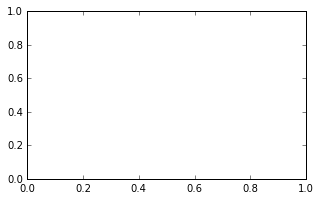

In [12]:
fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')

In [5]:
# lines = []
# env.reset_state()
# print env.state_tuple
# while(env.terminated == False):
#     state, reward = env.next_step(0)
#     lines.append([state.ped_x,state.ped_y,state.pos_x,state.pos_y, reward])
# env.reset_state()
# print lines

In [6]:
from qlearning import *
from sarsa import *

In [7]:
def getdata(sar):
    data = np.zeros((len(sar),len(sar[0].episodes)))
    i = 0
    for s in sar:
        data[i] = s.episodes
        i+=1
    return data[:10000]

def plot_and_save(fname, mean, std, ind):
    plt.figure(figsize=(7, 7))  # Don't create a humongous figure
    plt.errorbar(ind, mean, std, linestyle='None', color='r', marker='^')
#     pl.ylim([-1000,0])
#     pl.yticks(list(pl.yticks()[0]) + [-100,-200,-300,-400])
    plt.xlabel("episode")
    plt.ylabel("undiscounted mean rewards")
    plt.savefig(fname, format='png') 


def get_graph(ag, epscount, fname):
    data = getdata(ag)
    std = np.std(data,axis=0)
    mean = np.mean(data,axis=0)
#     print data.shape, mean.shape
    plot_and_save(fname,mean,std,np.arange(epscount))

In [8]:
def run_Ql():
    for index, agent in enumerate(ag):
        agent.run(env[index])
    get_graph(ag,epscount=300,fname='ql_exp3_2correct_graph.png')

trials = 10
sampler = Sampler( ped_posx_low=45, ped_posx_high=105, ped_posy_low=45, ped_posy_high=105, ped_vel_mean=1, ped_vel_std=0.01, car_posx_mean=0.01, car_posx_std=0.01, car_posy_mean=1, car_posy_std=0.01, car_vel_mean=15, car_vel_std=5 )
env = [CarBrakerEnv(sampler)]* trials
ag = [QLearning(env[0],eps_cnt=300)]*(trials)    
    


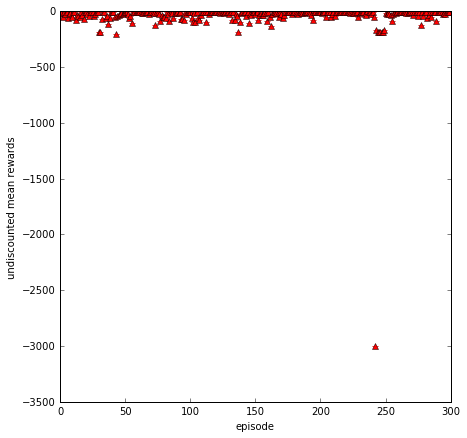

In [9]:
run_Ql()        


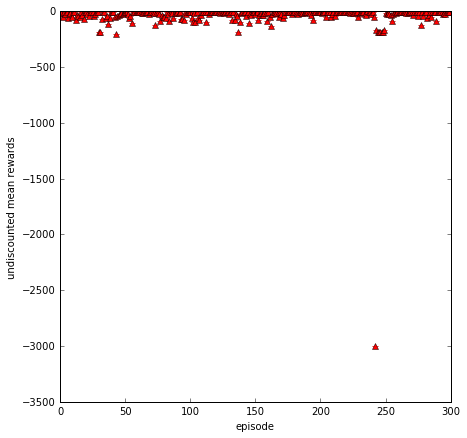

In [10]:
get_graph(ag,epscount=300,fname='ql_exp3_2correct_graph.png')

[MoviePy] >>>> Building video braking_system/experiments/exp3/ql_trial3eps_1.mp4
[MoviePy] Writing video braking_system/experiments/exp3/ql_trial3eps_1.mp4


 97%|█████████▋| 36/37 [00:04<00:00,  6.75it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: braking_system/experiments/exp3/ql_trial3eps_1.mp4 



[MoviePy] >>>> Building video braking_system/experiments/exp3/ql_trial3eps_150.mp4
[MoviePy] Writing video braking_system/experiments/exp3/ql_trial3eps_150.mp4


 97%|█████████▋| 29/30 [00:03<00:00,  6.91it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: braking_system/experiments/exp3/ql_trial3eps_150.mp4 



[MoviePy] >>>> Building video braking_system/experiments/exp3/ql_trial3eps_300.mp4
[MoviePy] Writing video braking_system/experiments/exp3/ql_trial3eps_300.mp4


 97%|█████████▋| 29/30 [00:03<00:00,  6.63it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: braking_system/experiments/exp3/ql_trial3eps_300.mp4 



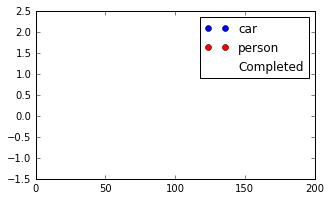

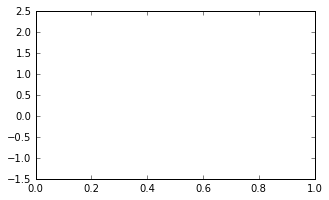

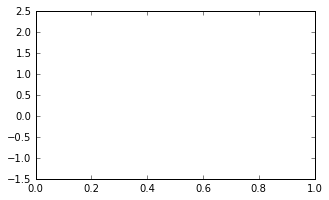

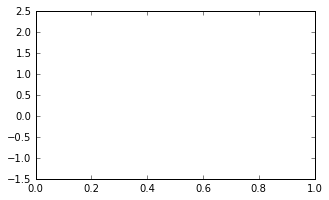

In [13]:
fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
t = 0
episode_id = 1
ql = ag[8]
def make_vid(fname):
    fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
    xx = np.linspace(-1,140,200) # the x vector
    ax.set_ylim(-1.5,2.5)
    
    animation =mpy.VideoClip(make_frame_mpl, duration=len(ql.episodes_values[episode_id])/4.0+3)
    # animation.write_gif("sinc_mpl.gif", fps=20)
    animation.write_videofile(fname,fps=4)
make_vid("braking_system/experiments/exp3/ql_trial3eps_1.mp4")
t = 0
episode_id = 150
ql = ag[8]
make_vid("braking_system/experiments/exp3/ql_trial3eps_150.mp4")
t = 0
episode_id = 300
ql = ag[8]
make_vid("braking_system/experiments/exp3/ql_trial3eps_300.mp4")

In [14]:
def run_SARSA():
    for index, agent in enumerate(sag):
        agent.run(env[index])
    get_graph(sag,epscount=300,fname='sarsa_exp3_2_graph.png')


In [15]:
trials = 10
sampler = Sampler( ped_posx_low=45, ped_posx_high=105, ped_posy_low=45, ped_posy_high=105, ped_vel_mean=1, ped_vel_std=0.01, car_posx_mean=0.01, car_posx_std=0.01, car_posy_mean=1, car_posy_std=0.01, car_vel_mean=15, car_vel_std=5 )
env = [CarBrakerEnv(sampler)]* trials
sag = [SARSA(env[0],eps_cnt=300)]*(trials)    

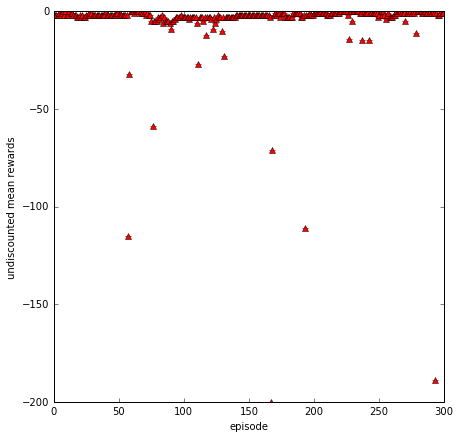

In [16]:
run_SARSA()

class State(tuple):
    'State(ped_x, ped_y, pos_x, pos_y, vel)'

    __slots__ = ()

    _fields = ('ped_x', 'ped_y', 'pos_x', 'pos_y', 'vel')

    def __new__(_cls, ped_x, ped_y, pos_x, pos_y, vel):
        'Create new instance of State(ped_x, ped_y, pos_x, pos_y, vel)'
        return _tuple.__new__(_cls, (ped_x, ped_y, pos_x, pos_y, vel))

    @classmethod
    def _make(cls, iterable, new=tuple.__new__, len=len):
        'Make a new State object from a sequence or iterable'
        result = new(cls, iterable)
        if len(result) != 5:
            raise TypeError('Expected 5 arguments, got %d' % len(result))
        return result

    def __repr__(self):
        'Return a nicely formatted representation string'
        return 'State(ped_x=%r, ped_y=%r, pos_x=%r, pos_y=%r, vel=%r)' % self

    def _asdict(self):
        'Return a new OrderedDict which maps field names to their values'
        return OrderedDict(zip(self._fields, self))

    def _replace(_self, **kwds):
        'Ret

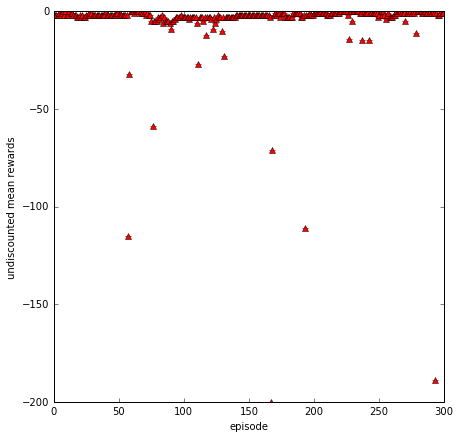

In [17]:
get_graph(sag,epscount=300,fname='sarsa_exp3_2_graph.png')

[MoviePy] >>>> Building video braking_system/experiments/exp3/sarsa3_eps_1.mp4
[MoviePy] Writing video braking_system/experiments/exp3/sarsa3_eps_1.mp4


 96%|█████████▋| 26/27 [00:03<00:00,  7.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: braking_system/experiments/exp3/sarsa3_eps_1.mp4 

[MoviePy] >>>> Building video braking_system/experiments/exp3/sarsa3_eps_200.mp4
[MoviePy] Writing video braking_system/experiments/exp3/sarsa3_eps_200.mp4


 96%|█████████▋| 26/27 [00:03<00:00,  5.59it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: braking_system/experiments/exp3/sarsa3_eps_200.mp4 



[MoviePy] >>>> Building video braking_system/experiments/exp3/sarsa3_eps_300.mp4
[MoviePy] Writing video braking_system/experiments/exp3/sarsa3_eps_300.mp4


 96%|█████████▌| 25/26 [00:02<00:00,  8.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: braking_system/experiments/exp3/sarsa3_eps_300.mp4 



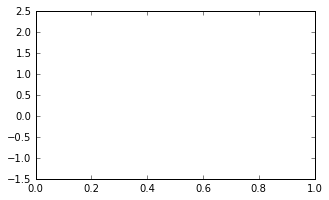

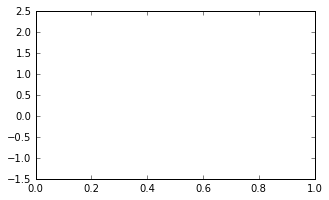

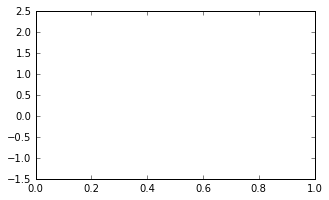

In [18]:
t = 0
episode_id = 1
ql = sag[8]
make_vid("braking_system/experiments/exp3/sarsa3_eps_1.mp4")
t = 0
episode_id = 200
ql = sag[8]
make_vid("braking_system/experiments/exp3/sarsa3_eps_200.mp4")
t = 0
episode_id = 300
ql = sag[8]
make_vid("braking_system/experiments/exp3/sarsa3_eps_300.mp4")